In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score,recall_score,precision_score

In [2]:
%matplotlib inline

In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
def plot_history(history):
    """
    Plots the Graph for the model training
    """
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [5]:
data = pd.read_excel("musk_csv.xlsx")

In [6]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [7]:
temp = list(data.dtypes)

In [8]:
print(temp)

[dtype('int64'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),

In [9]:
print(f"Unique values of molecule_name:\n{data['molecule_name'].unique()}")

Unique values of molecule_name:
['MUSK-211' 'MUSK-212' 'MUSK-213' 'MUSK-214' 'MUSK-215' 'MUSK-217'
 'MUSK-219' 'MUSK-224' 'MUSK-228' 'MUSK-238' 'MUSK-240' 'MUSK-256'
 'MUSK-273' 'MUSK-284' 'MUSK-287' 'MUSK-294' 'MUSK-300' 'MUSK-306'
 'MUSK-314' 'MUSK-321' 'MUSK-322' 'MUSK-323' 'MUSK-330' 'MUSK-331'
 'MUSK-333' 'MUSK-344' 'MUSK-f152' 'MUSK-f158' 'MUSK-j33' 'MUSK-j51'
 'MUSK-jf15' 'MUSK-jf17' 'MUSK-jf46' 'MUSK-jf47' 'MUSK-jf58' 'MUSK-jf59'
 'MUSK-jf66' 'MUSK-jf67' 'MUSK-jf78' 'NON-MUSK-192' 'NON-MUSK-197'
 'NON-MUSK-199' 'NON-MUSK-200' 'NON-MUSK-207' 'NON-MUSK-208'
 'NON-MUSK-210' 'NON-MUSK-216' 'NON-MUSK-220' 'NON-MUSK-226'
 'NON-MUSK-232' 'NON-MUSK-233' 'NON-MUSK-244' 'NON-MUSK-249'
 'NON-MUSK-251' 'NON-MUSK-252' 'NON-MUSK-253' 'NON-MUSK-270'
 'NON-MUSK-271' 'NON-MUSK-286' 'NON-MUSK-288' 'NON-MUSK-289'
 'NON-MUSK-290' 'NON-MUSK-295' 'NON-MUSK-296' 'NON-MUSK-297'
 'NON-MUSK-305' 'NON-MUSK-308' 'NON-MUSK-309' 'NON-MUSK-318'
 'NON-MUSK-319' 'NON-MUSK-320' 'NON-MUSK-326' 'NON-MUSK-327'
 'N

In [10]:
print(f"Value counts of molecule_name:\n{data['molecule_name'].value_counts()}")

Value counts of molecule_name:
NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-j130       2
NON-MUSK-290        2
NON-MUSK-295        2
NON-MUSK-j97        1
NON-MUSK-j96        1
Name: molecule_name, Length: 102, dtype: int64


In [11]:
print(f"Unique values of conformation_name: {len(data['conformation_name'].unique())}")

Unique values of conformation_name: 6598


In [12]:
data.shape

(6598, 170)

In [13]:
print(dict(data.isnull().sum()))

{'ID': 0, 'molecule_name': 0, 'conformation_name': 0, 'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'f6': 0, 'f7': 0, 'f8': 0, 'f9': 0, 'f10': 0, 'f11': 0, 'f12': 0, 'f13': 0, 'f14': 0, 'f15': 0, 'f16': 0, 'f17': 0, 'f18': 0, 'f19': 0, 'f20': 0, 'f21': 0, 'f22': 0, 'f23': 0, 'f24': 0, 'f25': 0, 'f26': 0, 'f27': 0, 'f28': 0, 'f29': 0, 'f30': 0, 'f31': 0, 'f32': 0, 'f33': 0, 'f34': 0, 'f35': 0, 'f36': 0, 'f37': 0, 'f38': 0, 'f39': 0, 'f40': 0, 'f41': 0, 'f42': 0, 'f43': 0, 'f44': 0, 'f45': 0, 'f46': 0, 'f47': 0, 'f48': 0, 'f49': 0, 'f50': 0, 'f51': 0, 'f52': 0, 'f53': 0, 'f54': 0, 'f55': 0, 'f56': 0, 'f57': 0, 'f58': 0, 'f59': 0, 'f60': 0, 'f61': 0, 'f62': 0, 'f63': 0, 'f64': 0, 'f65': 0, 'f66': 0, 'f67': 0, 'f68': 0, 'f69': 0, 'f70': 0, 'f71': 0, 'f72': 0, 'f73': 0, 'f74': 0, 'f75': 0, 'f76': 0, 'f77': 0, 'f78': 0, 'f79': 0, 'f80': 0, 'f81': 0, 'f82': 0, 'f83': 0, 'f84': 0, 'f85': 0, 'f86': 0, 'f87': 0, 'f88': 0, 'f89': 0, 'f90': 0, 'f91': 0, 'f92': 0, 'f93': 0, 'f94': 0, 'f95': 0, 'f96'

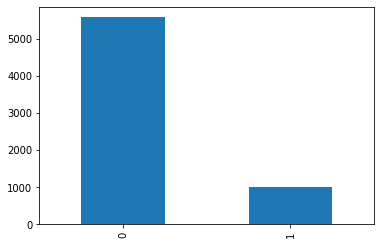

In [14]:
data['class'].value_counts().plot('bar')

In [101]:
class_weight = {}
unique_class = list(data['class'].unique())
for i in unique_class:
    class_weight[i] = (100 - round((len(data[data['class'] == i])/len(data)) * 100))/100

In [102]:
class_weight

{1: 0.85, 0: 0.15}

In [15]:
le_mn = LabelEncoder()
data['molecule_name'] = le_mn.fit_transform(data['molecule_name'])

In [16]:
le_cn = LabelEncoder()
data['conformation_name'] = le_cn.fit_transform(data['conformation_name'])

In [17]:
data.drop(['ID','conformation_name'],inplace=True,axis=1)

In [18]:
data.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,0,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,0,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,0,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,0,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,0,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


In [19]:
x_col_list = list(data.columns[data.columns != 'class'])
y_col_list = list(data.columns[data.columns == 'class'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data[x_col_list], data[y_col_list], test_size=0.2, random_state=0)

In [21]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [23]:
# del model

Train on 5278 samples, validate on 1320 samples
Epoch 1/9
5278/5278 [==============================] - 0s 56us/step - loss: 1.5588 - acc: 0.9087 - val_loss: 1.7758 - val_acc: 0.9106
Epoch 2/9
5278/5278 [==============================] - 0s 37us/step - loss: 0.5100 - acc: 0.9534 - val_loss: 0.3229 - val_acc: 0.9598
Epoch 3/9
5278/5278 [==============================] - 0s 39us/step - loss: 0.2527 - acc: 0.9710 - val_loss: 0.2150 - val_acc: 0.9727
Epoch 4/9
5278/5278 [==============================] - 0s 39us/step - loss: 0.1434 - acc: 0.9778 - val_loss: 0.0951 - val_acc: 0.9841
Epoch 5/9
5278/5278 [==============================] - 0s 39us/step - loss: 0.1584 - acc: 0.9788 - val_loss: 0.1722 - val_acc: 0.9765
Epoch 6/9
5278/5278 [==============================] - 0s 36us/step - loss: 0.1607 - acc: 0.9792 - val_loss: 0.1151 - val_acc: 0.9856
Epoch 7/9
5278/5278 [==============================] - 0s 38us/step - loss: 0.1087 - acc: 0.9854 - val_loss: 0.1329 - val_acc: 0.9833
Epoch 8/9
5278

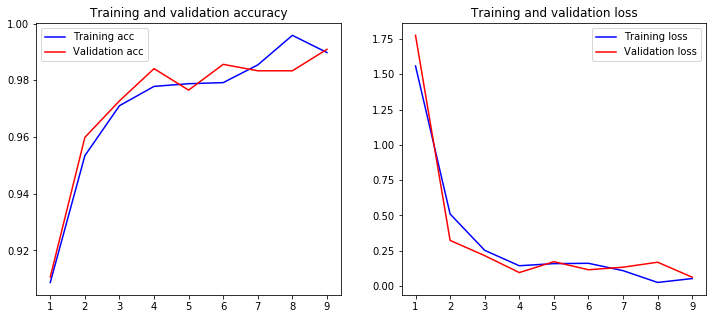

In [24]:
model = Sequential()
model.add(Dense(170, activation='relu'))
model.add(Dense(85, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32, epochs=9,verbose=1)
plot_history(history)

Train on 5278 samples, validate on 1320 samples
Epoch 1/9
5278/5278 [==============================] - 1s 97us/step - loss: 0.8888 - acc: 0.8463 - val_loss: 0.5139 - val_acc: 0.9659
Epoch 2/9
5278/5278 [==============================] - 0s 51us/step - loss: 0.2882 - acc: 0.9265 - val_loss: 0.2685 - val_acc: 0.9712
Epoch 3/9
5278/5278 [==============================] - 0s 50us/step - loss: 0.0855 - acc: 0.9672 - val_loss: 0.4862 - val_acc: 0.9652
Epoch 4/9
5278/5278 [==============================] - 0s 49us/step - loss: 0.1412 - acc: 0.9615 - val_loss: 0.0415 - val_acc: 0.9924
Epoch 5/9
5278/5278 [==============================] - 0s 51us/step - loss: 0.0580 - acc: 0.9788 - val_loss: 0.1580 - val_acc: 0.9864
Epoch 6/9
5278/5278 [==============================] - 0s 48us/step - loss: 0.0628 - acc: 0.9790 - val_loss: 0.1697 - val_acc: 0.9780
Epoch 7/9
5278/5278 [==============================] - 0s 48us/step - loss: 0.1221 - acc: 0.9668 - val_loss: 0.0469 - val_acc: 0.9909
Epoch 8/9
5278

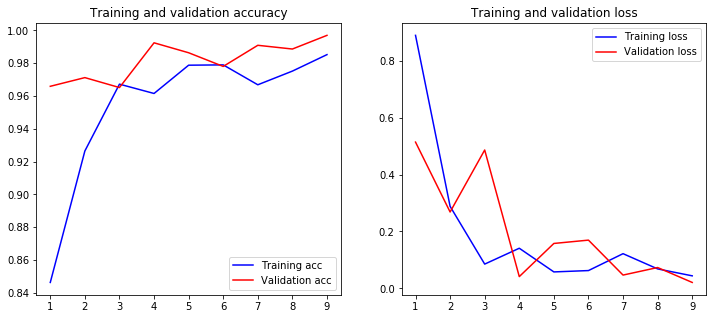

In [106]:
ann_model_2 = Sequential()
ann_model_2.add(Dense(170, activation='relu'))
ann_model_2.add(Dense(85, activation='relu'))
ann_model_2.add(Dense(1,activation='sigmoid'))
ann_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
ann_2_history = ann_model_2.fit(X_train, y_train, validation_data = (X_test,y_test), batch_size=32, epochs=9,verbose=1,class_weight=class_weight)
plot_history(ann_2_history)

In [107]:
prediction = np.argmax(ann_model_2.predict(X_test),axis=-1)

In [108]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1120
           1       0.00      0.00      0.00       200

   micro avg       0.85      0.85      0.85      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.72      0.85      0.78      1320



In [111]:
print(f"F1-score: {f1_score(y_test,prediction)}")
print(f"Recall: {recall_score(y_test,prediction)}")
print(f"Precision: {precision_score(y_test,prediction)}")

F1-score: 0.0
Recall: 0.0
Precision: 0.0


In [109]:
model.save('model.h5')
ann_model_2.save('ann_model_2.h5')